In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel('C:/Users/Administrador/OneDrive\Ambiente de Trabalho/Article_Organize_Data/Clean_Single_Data.xlsx')
df

,No Amostra,Data de colheita,Zona de Produção,Espécie,Cd (mg/kg),Hg (mg/kg),Pb (mg/kg),E.coli (NMP/100G),Day,Month,Year
0,362/21,13/04/2021,ETJ,Pé-de-burro,0.24,0.028,0.24,NaN,13,Apr,2021
1,363/21,13/04/2021,ESD1,Ostra-portuguesa,0.50,0.026,0.12,NaN,13,Apr,2021
2,366/21,13/04/2021,RIAV4,Ostra-japonesa,0.18,0.045,0.14,NaN,13,Apr,2021
3,369/21,19/04/2021,LOB,Amêijoa-relógio,0.09,0.011,0.70,NaN,19,Apr,2021
4,376/21,20/04/2021,L7c2,Amêijoa-boa,0.06,0.030,0.02,NaN,20,Apr,2021
...,...,...,...,...,...,...,...,...,...,...,...
1812,1044/22,28/09/2022,RIAV1,Longueirão,0.13,0.016,0.14,20.0,28,Sept,2022
1813,1045/22,28/09/2022,RIAV1,Berbigão,0.16,0.030,0.10,20.0,28,Sept,2022
1814,1046/22,28/09/2022,RIAV1,Amêijoa-japonesa,0.26,0.017,0.06,NaN,28,Sept,2022
1815,1047/22,28/09/2022,L1,Mexilhão,0.28,0.012,0.18,NaN,28,Sept,2022


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No Amostra         1817 non-null   object 
 1   Data de colheita   1817 non-null   object 
 2   Zona de Produção   1817 non-null   object 
 3   Espécie            1817 non-null   object 
 4   Cd (mg/kg)         1811 non-null   float64
 5   Hg (mg/kg)         1811 non-null   float64
 6   Pb (mg/kg)         1817 non-null   float64
 7   E.coli (NMP/100G)  522 non-null    float64
 8   Day                1817 non-null   int64  
 9   Month              1817 non-null   object 
 10  Year               1817 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 156.3+ KB


# Data Cleaning

## Data Standardization

In [4]:
df['Espécie'].value_counts()

Ostra-japonesa      259
Mexilhão            245
Amêijoa-boa         227
Ostra-portuguesa    214
Amêijoa-japonesa    163
Lambujinha          151
Berbigão            148
Longueirão           83
Amêijoa-branca       79
Amêijoa-macha        56
Conquilha            56
Amêijola             46
Ostra-plana          31
Pé-de-burro          27
Amêijoa-relógio      10
Ostra                 9
Vieira                6
Amêijoa-cão           5
Taralhão              2
Name: Espécie, dtype: int64

In [5]:
# Let´s select only the species we want to analyse
df = df[(df['Espécie']=='Ostra-japonesa') |
  (df['Espécie']=='Mexilhão') |
  (df['Espécie']=='Amêijoa-boa') |
  (df['Espécie']=='Ostra-portuguesa') |
  (df['Espécie']=='Amêijoa-japonesa') |
  (df['Espécie']=='Lambujinha')]

df['Espécie'].value_counts()

Ostra-japonesa      259
Mexilhão            245
Amêijoa-boa         227
Ostra-portuguesa    214
Amêijoa-japonesa    163
Lambujinha          151
Name: Espécie, dtype: int64

In [6]:
# Let´s clean the 'Zona de Produção' taking into the account the Anova and Non-Parametric test Results
df['Zona de Produção'].value_counts()

ETJ      166
ESD1     101
EMR       99
ESD2      80
LOB       60
OLH4      38
RIAV1     36
RIAV4     36
OLH2      36
TAV       35
OLH5      35
LAG       35
ELM       35
FAR2      34
FUZ       33
L5        32
RIAV3     32
EMN       31
RIAV2     29
OLH1      29
FAR1      29
POR2      26
L7c1      19
OLH3      18
LAL       17
L4        16
L7a       15
L1        15
VT        14
L7b       14
GUA       12
L7c2      10
L2         9
POR3       9
L8         8
L3         6
ZNV        4
L6         3
EMI        3
Name: Zona de Produção, dtype: int64

In [7]:
# RIAV
df[df['Zona de Produção'].str.contains('RIAV')]['Zona de Produção'].value_counts()

RIAV4    36
RIAV1    36
RIAV3    32
RIAV2    29
Name: Zona de Produção, dtype: int64

In [8]:
df.loc[df['Zona de Produção'].isin(['RIAV1',
                                   'RIAV4',
                                   'RIAV3',
                                   'RIAV2']),'Zona de Produção'] = 'RIAV'

In [9]:
# OLH
df[df['Zona de Produção'].str.contains('OLH')]['Zona de Produção'].value_counts()

OLH4    38
OLH2    36
OLH5    35
OLH1    29
OLH3    18
Name: Zona de Produção, dtype: int64

In [10]:
df.loc[df['Zona de Produção'].isin(['OLH1',
                                   'OLH4',
                                   'OLH3',
                                   'OLH2',
                                   'OLH5']),'Zona de Produção'] = 'OLH'

In [11]:
# FAR
df[df['Zona de Produção'].str.contains('FAR')]['Zona de Produção'].value_counts()

FAR2    34
FAR1    29
Name: Zona de Produção, dtype: int64

In [12]:
df.loc[df['Zona de Produção'].isin(['FAR1',
                                   'FAR2']),'Zona de Produção'] = 'FAR'

In [13]:
# POR
df[df['Zona de Produção'].str.contains('POR')]['Zona de Produção'].value_counts()

POR2    26
POR3     9
Name: Zona de Produção, dtype: int64

In [14]:
df.loc[df['Zona de Produção'].isin(['POR2',
                                   'POR3']),'Zona de Produção'] = 'POR'

In [15]:
df['Zona de Produção'].nunique()

30

## Dealing With Missing Values

In [16]:
df.isnull().sum()

No Amostra             0
Data de colheita       0
Zona de Produção       0
Espécie                0
Cd (mg/kg)             3
Hg (mg/kg)             3
Pb (mg/kg)             0
E.coli (NMP/100G)    895
Day                    0
Month                  0
Year                   0
dtype: int64

In [17]:
df.shape

(1259, 11)

In [18]:
df.dropna(inplace=True)

In [19]:
df['Espécie'].value_counts()

Ostra-portuguesa    109
Amêijoa-japonesa     57
Lambujinha           52
Ostra-japonesa       51
Amêijoa-boa          48
Mexilhão             47
Name: Espécie, dtype: int64

In [20]:
df['Zona de Produção'].value_counts()

ETJ     61
ESD1    55
EMR     45
OLH     29
ESD2    27
RIAV    27
ELM     18
LOB     18
EMN     12
L5       9
L4       8
FAR      8
FUZ      6
LAG      6
POR      5
LAL      5
TAV      5
L1       4
EMI      3
VT       3
L7c1     3
L8       3
L7a      2
L7b      1
L6       1
Name: Zona de Produção, dtype: int64

# EDA

## Lead Concentration By Specie

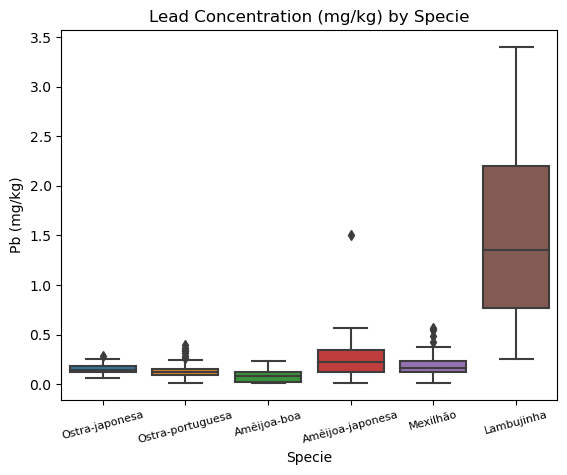

In [21]:
sns.boxplot(df['Espécie'],df['Pb (mg/kg)'])
plt.title('Lead Concentration (mg/kg) by Specie')
plt.xlabel('Specie')
plt.ylabel('Pb (mg/kg)')
plt.xticks(fontsize=8,rotation=15)
plt.show()

## Lead Concentration By Season

__Get the Season__

We can classify the season based on the month:
* Dry: until March
* Rainny; until September

In [22]:
df['Month'].value_counts()

Sept    108
Mar     104
Nov      25
Jul      18
Aug      17
Oct      17
Jan      17
May      17
Jun      12
Dec      11
Apr      10
Feb       8
Name: Month, dtype: int64

In [23]:
def season(month):
    if month == 'Jan':
        return 'Rainny'
    elif month == 'Feb':
        return 'Rainny'
    elif month=='Mar':
        return 'Rainny'
    elif month=='Apr':
        return 'Dry'
    elif month=='May':
        return 'Dry'
    elif month == 'Jun':
        return 'Dry'
    elif month=='Jul':
        return 'Dry'
    elif month=='Aug':
        return 'Dry'
    elif month=='Sept':
        return 'Dry'
    elif month=='Oct':
        return 'Rainny'
    elif month=='Nov':
        return 'Rainny'
    elif month=='Dec':
        return 'Rainny'

In [24]:
df['Season'] = df['Month'].apply(season)

In [25]:
df['Season'].value_counts()

Dry       182
Rainny    182
Name: Season, dtype: int64

In [26]:
df['Season'].isnull().sum()

0

__Lead Concentration By Season__

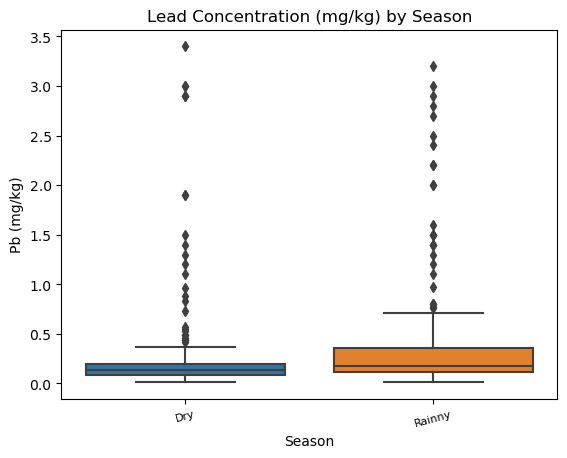

In [27]:
sns.boxplot(df['Season'],df['Pb (mg/kg)'])
plt.title('Lead Concentration (mg/kg) by Season')
plt.xlabel('Season')
plt.ylabel('Pb (mg/kg)')
plt.xticks(fontsize=8,rotation=15)
plt.show()

## Lead Concentration By Area Classification

__Get the Production Area Classification__

Take into account the Portaria N.º 1421/2006, it is possibel to classify the production area based on the E.coli quantity:
* A : <= 230 NMP/100G
* B: 230 - 4600 NMP/100G
* C: 4600 - 46000 NMP/100G
* Forbidden: < 46000 NMP/100G

In [28]:
def classify(coli):
    if coli <= 230:
        return 'A'
    elif 230 < coli <= 4600:
        return 'B'
    elif 4600 < coli <= 46000:
        return 'C'
    else:
        return 'Forbidden'

In [29]:
df['Class'] = df['E.coli (NMP/100G)'].apply(classify)

In [30]:
df['Class'].value_counts()

A            215
B            130
C             18
Forbidden      1
Name: Class, dtype: int64

__Classes By Specie__

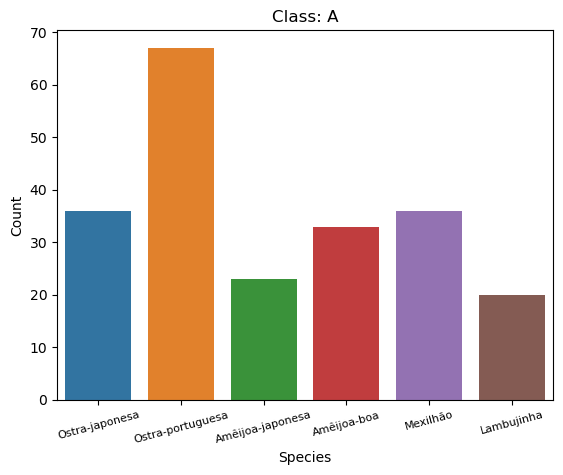

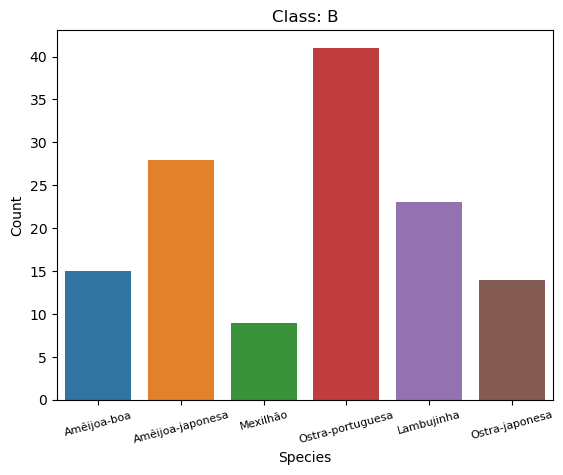

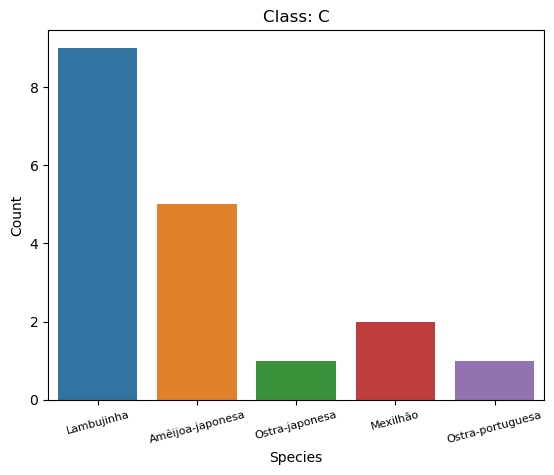

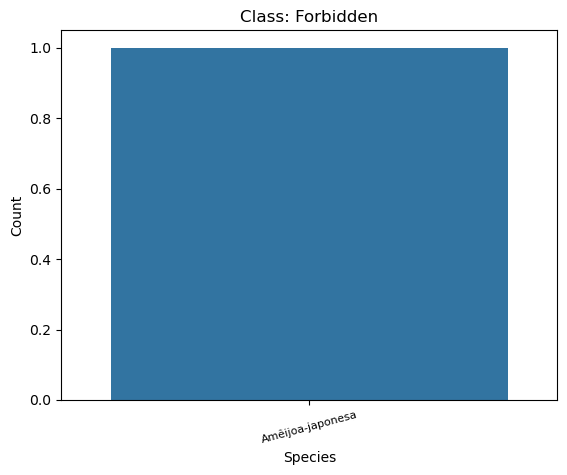

In [31]:
for class_label, classify_areas in df.groupby('Class'):
    plt.figure()  # Create a new figure for each class
    sns.countplot(data=classify_areas, x='Espécie')
    plt.title( 'Class: {}'.format(class_label))
    plt.xlabel('Species')
    plt.xticks(fontsize=8,rotation=15)
    plt.ylabel('Count')

__Classes By Production Area__

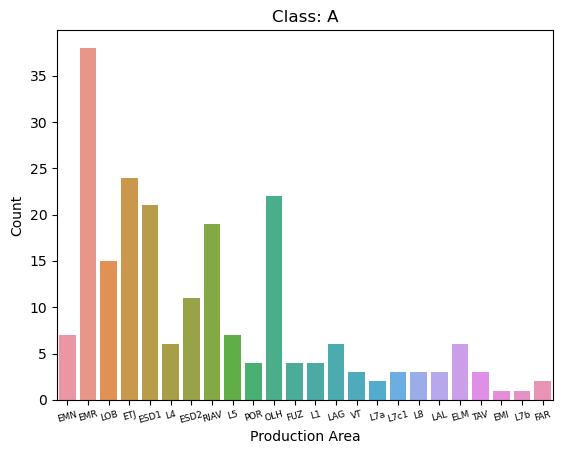

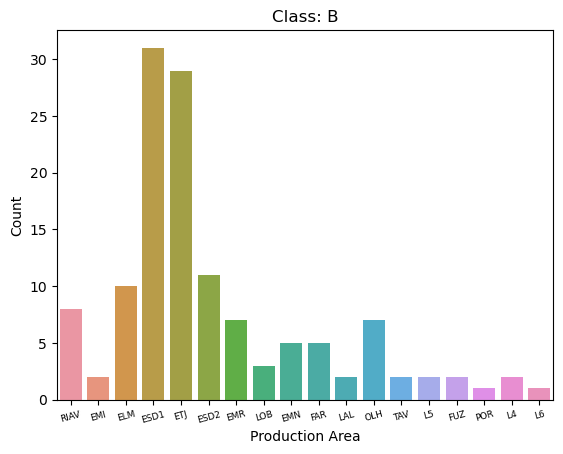

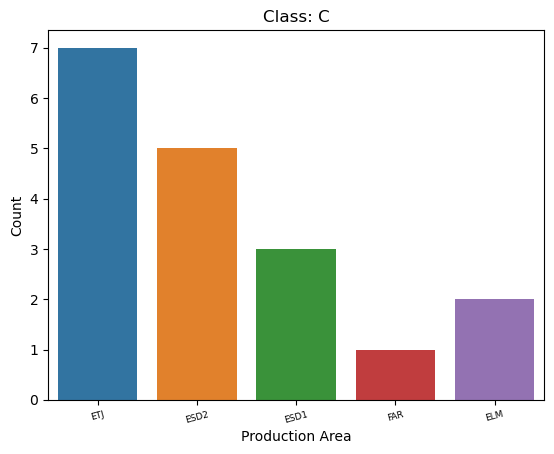

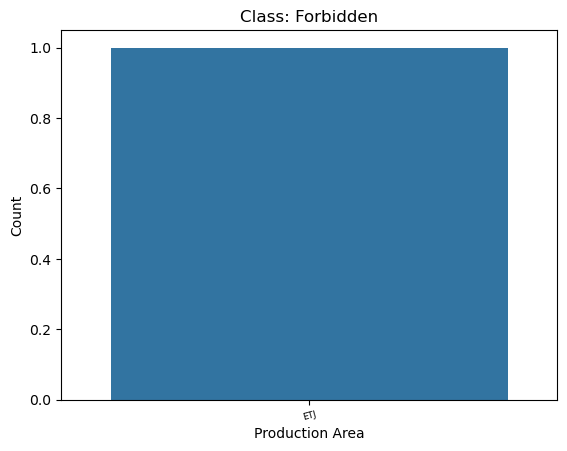

In [32]:
for class_label, classify_areas in df.groupby('Class'):
    plt.figure()  # Create a new figure for each class
    sns.countplot(data=classify_areas, x='Zona de Produção')
    plt.title( 'Class: {}'.format(class_label))
    plt.xlabel('Production Area')
    plt.xticks(fontsize=6.5,rotation=15)
    plt.ylabel('Count')

__Lead Concentration By Class__

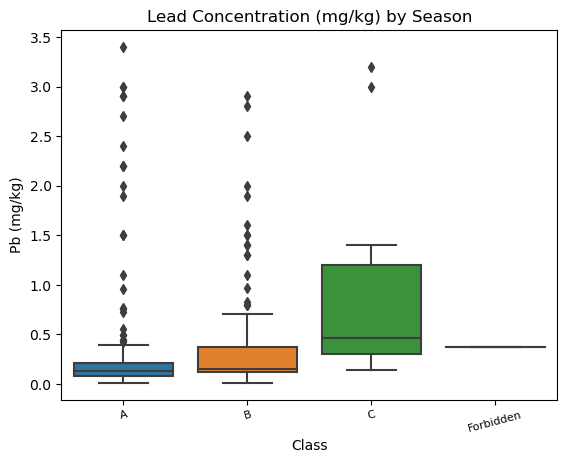

In [33]:
sns.boxplot(df['Class'],df['Pb (mg/kg)'])
plt.title('Lead Concentration (mg/kg) by Season')
plt.xlabel('Class')
plt.ylabel('Pb (mg/kg)')
plt.xticks(fontsize=8,rotation=15)
plt.show()

## Lead Concentration By Production Area

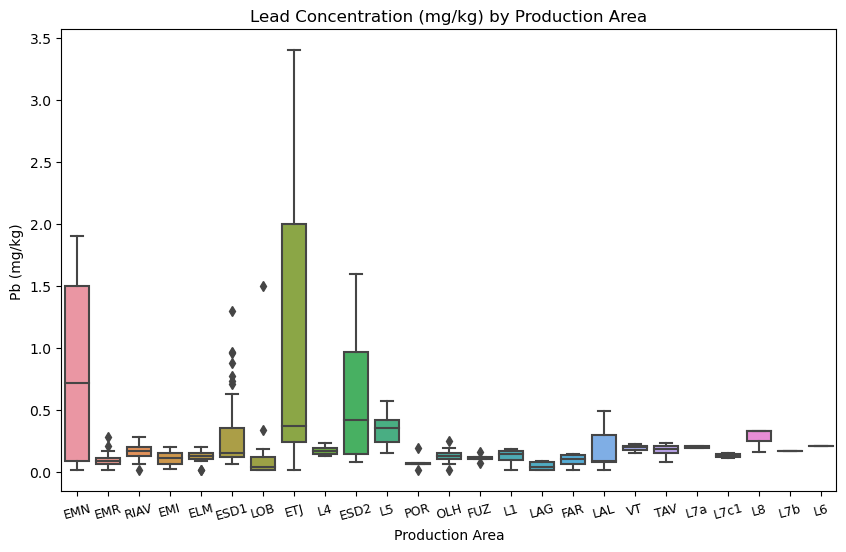

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Zona de Produção'],df['Pb (mg/kg)'])
plt.title('Lead Concentration (mg/kg) by Production Area')
plt.xlabel('Production Area')
plt.ylabel('Pb (mg/kg)')
plt.xticks(fontsize=9,rotation=15)
plt.show()

## Which Variable has More Influence to a High [Pb}?

### [Cd] vs [Pb]

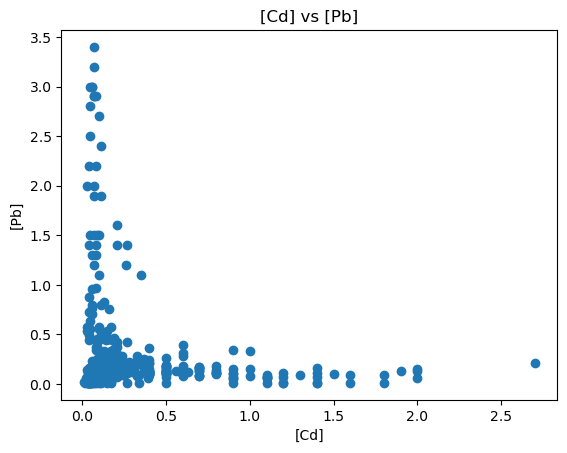

In [35]:
plt.scatter(df['Cd (mg/kg)'],df['Pb (mg/kg)'])
plt.title('[Cd] vs [Pb]')
plt.xlabel('[Cd]')
plt.ylabel('[Pb]')
plt.show()

### [Hg] vs [Pb]

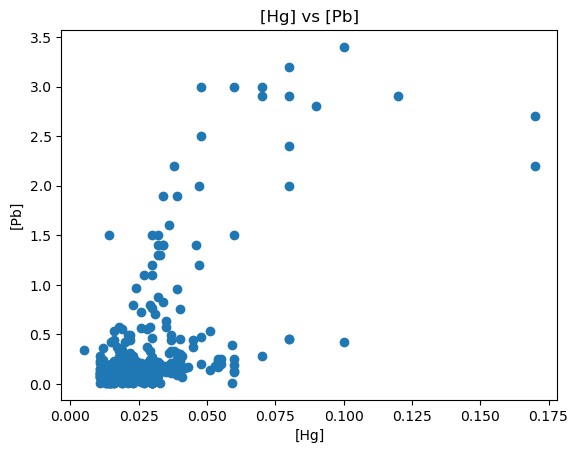

In [36]:
plt.scatter(df['Hg (mg/kg)'],df['Pb (mg/kg)'])
plt.title('[Hg] vs [Pb]')
plt.xlabel('[Hg]')
plt.ylabel('[Pb]')
plt.show()

### E.coli vs [Pb]

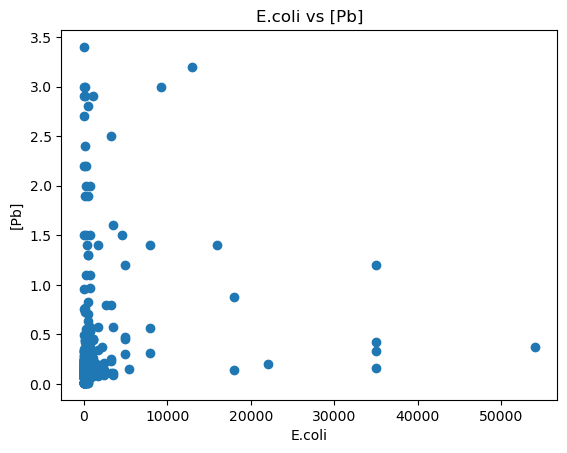

In [37]:
plt.scatter(df['E.coli (NMP/100G)'],df['Pb (mg/kg)'])
plt.title('E.coli vs [Pb]')
plt.xlabel('E.coli')
plt.ylabel('[Pb]')
plt.show()

### Correlation Between Variables

<AxesSubplot:>

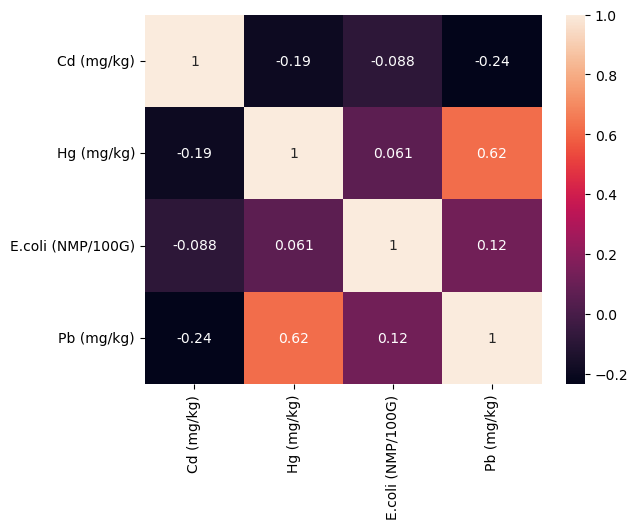

In [38]:
# Pearson Correlation
corr = df[['Cd (mg/kg)','Hg (mg/kg)','E.coli (NMP/100G)','Pb (mg/kg)']].corr()
sns.heatmap(corr, annot=True)

In [ ]:
df.to_csv('C:/Users/Administrador/OneDrive/Ambiente de Trabalho/Article_Organize_Data/PCA_Data.csv',index=False)

# Multivariate Relationships

 PCA (Principal Component Analysis) to Understand Patterns in Data

## 1. Data Preprocessing

In [39]:
df_1= df[['Espécie','Zona de Produção','Season','Class','Cd (mg/kg)','Hg (mg/kg)','E.coli (NMP/100G)','Pb (mg/kg)']]
df_p = df_1.copy()
df_p

,Espécie,Zona de Produção,Season,Class,Cd (mg/kg),Hg (mg/kg),E.coli (NMP/100G),Pb (mg/kg)
8,Ostra-japonesa,EMN,Dry,A,0.14,0.019,17.0,0.08
10,Ostra-portuguesa,EMR,Dry,A,0.90,0.016,17.0,0.06
27,Ostra-portuguesa,EMR,Rainny,A,1.20,0.030,45.0,0.01
45,Amêijoa-boa,RIAV,Dry,B,0.04,0.019,490.0,0.01
200,Amêijoa-japonesa,EMI,Dry,B,0.18,0.024,1300.0,0.20
...,...,...,...,...,...,...,...,...
1798,Ostra-japonesa,RIAV,Dry,A,0.35,0.025,78.0,0.21
1803,Mexilhão,L5,Dry,A,0.20,0.011,40.0,0.15
1804,Ostra-portuguesa,EMR,Dry,A,1.40,0.030,230.0,0.01
1806,Ostra-japonesa,ELM,Dry,B,0.20,0.030,490.0,0.10


In [40]:
categorical_columns = ['Espécie','Zona de Produção','Season','Class']
for col in categorical_columns:
    print('There are {} unique values in the column {}'.format(df[col].nunique(),col))

There are 6 unique values in the column Espécie
There are 25 unique values in the column Zona de Produção
There are 2 unique values in the column Season
There are 4 unique values in the column Class


In [41]:
df_1

,Espécie,Zona de Produção,Season,Class,Cd (mg/kg),Hg (mg/kg),E.coli (NMP/100G),Pb (mg/kg)
8,Ostra-japonesa,EMN,Dry,A,0.14,0.019,17.0,0.08
10,Ostra-portuguesa,EMR,Dry,A,0.90,0.016,17.0,0.06
27,Ostra-portuguesa,EMR,Rainny,A,1.20,0.030,45.0,0.01
45,Amêijoa-boa,RIAV,Dry,B,0.04,0.019,490.0,0.01
200,Amêijoa-japonesa,EMI,Dry,B,0.18,0.024,1300.0,0.20
...,...,...,...,...,...,...,...,...
1798,Ostra-japonesa,RIAV,Dry,A,0.35,0.025,78.0,0.21
1803,Mexilhão,L5,Dry,A,0.20,0.011,40.0,0.15
1804,Ostra-portuguesa,EMR,Dry,A,1.40,0.030,230.0,0.01
1806,Ostra-japonesa,ELM,Dry,B,0.20,0.030,490.0,0.10


__a. Encoding Categorical Data__

In [42]:
# One-Hot Encoding
df_p = pd.get_dummies(df_p, columns=['Zona de Produção', 'Espécie', 'Class'])

In [43]:
# Label Encoding
le = LabelEncoder()
df_p['Season'] = le.fit_transform(df_p['Season'])

In [44]:
df_p

,Season,Cd (mg/kg),Hg (mg/kg),E.coli (NMP/100G),Pb (mg/kg),Zona de Produção_ELM,Zona de Produção_EMI,Zona de Produção_EMN,Zona de Produção_EMR,Zona de Produção_ESD1,...,Espécie_Amêijoa-boa,Espécie_Amêijoa-japonesa,Espécie_Lambujinha,Espécie_Mexilhão,Espécie_Ostra-japonesa,Espécie_Ostra-portuguesa,Class_A,Class_B,Class_C,Class_Forbidden
8,0,0.14,0.019,17.0,0.08,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
10,0,0.90,0.016,17.0,0.06,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
27,1,1.20,0.030,45.0,0.01,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
45,0,0.04,0.019,490.0,0.01,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
200,0,0.18,0.024,1300.0,0.20,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,0,0.35,0.025,78.0,0.21,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1803,0,0.20,0.011,40.0,0.15,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1804,0,1.40,0.030,230.0,0.01,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
1806,0,0.20,0.030,490.0,0.10,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


__b. Feature Scalling__

Let´s apply standardization to only numerical data: ('Cd (mg/kg),'Hg (mg/kg)','E.coli (NMP/100G)','Pb (mg/kg)')

In [45]:
columns = ['Cd (mg/kg)','Hg (mg/kg)','E.coli (NMP/100G)','Pb (mg/kg)']
sc = StandardScaler()
df_p[columns] = sc.fit_transform(df_p[columns])

In [46]:
# Label Label Encoding to 'Season' --- Binary Classification
le = LabelEncoder()
df_p['Season'] = le.fit_transform(df_p['Season'])

In [47]:
df_p

,Season,Cd (mg/kg),Hg (mg/kg),E.coli (NMP/100G),Pb (mg/kg),Zona de Produção_ELM,Zona de Produção_EMI,Zona de Produção_EMN,Zona de Produção_EMR,Zona de Produção_ESD1,...,Espécie_Amêijoa-boa,Espécie_Amêijoa-japonesa,Espécie_Lambujinha,Espécie_Mexilhão,Espécie_Ostra-japonesa,Espécie_Ostra-portuguesa,Class_A,Class_B,Class_C,Class_Forbidden
8,0,-0.486949,-0.539319,-0.262086,-0.457015,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
10,0,1.412482,-0.699486,-0.262086,-0.490578,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
27,1,2.162257,0.047962,-0.256563,-0.574485,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
45,0,-0.736874,-0.539319,-0.168787,-0.574485,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
200,0,-0.386979,-0.272373,-0.009014,-0.255639,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,0,0.037894,-0.218984,-0.250054,-0.238858,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1803,0,-0.336994,-0.966432,-0.257550,-0.339546,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1804,0,2.662107,0.047962,-0.220072,-0.574485,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
1806,0,-0.336994,0.047962,-0.168787,-0.423453,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


## 2. PCA

In [48]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(df_p)
pca_results

array([[-5.17412000e-01,  4.87331188e-01],
       [-1.61144581e+00, -8.71993072e-01],
       [-1.45743589e+00, -1.56817095e+00],
       [-3.84986118e-01,  8.71527735e-01],
       [-7.69698463e-02,  5.65223930e-01],
       [-6.76434645e-01,  4.06872962e-01],
       [-9.87170195e-01, -3.72293947e-01],
       [-1.41834815e+00, -5.77754773e-01],
       [-6.26359741e-01,  8.87119046e-01],
       [-3.97937353e-02,  5.27401552e-01],
       [-1.53160803e-01,  5.78530481e-01],
       [-1.99845274e-01,  5.06839195e-01],
       [-1.64761726e+00, -1.85985334e+00],
       [-1.88560766e+00, -1.11423929e+00],
       [-1.30330069e+00, -6.47394090e-01],
       [ 5.90456537e-01,  2.72079351e-01],
       [ 5.77654489e+00, -2.63317354e+00],
       [ 2.20845923e+00, -6.97834358e-01],
       [-7.40121689e-01, -7.25029198e-02],
       [-7.49760747e-01, -5.86399542e-01],
       [-6.99506870e-01, -1.32362421e+00],
       [ 5.48547534e-01,  1.13628158e-02],
       [-9.56675999e-01, -5.43983076e-01],
       [-1.

In [49]:
# Crete a dataframe with pca_results
pca_results = pd.DataFrame(pca_results,columns=['PC1','PC2'])
pca_results

,PC1,PC2
0,-0.517412,0.487331
1,-1.611446,-0.871993
2,-1.457436,-1.568171
3,-0.384986,0.871528
4,-0.076970,0.565224
...,...,...
359,-0.409018,0.029480
360,-0.776944,0.596677
361,-1.701296,-1.810193
362,-0.108433,0.368412


In [50]:
# Get a PCA dataframe with the results
df_1.reset_index(inplace=True)
df_1.drop(columns=['index'],inplace=True)
df_1.reset_index(inplace=True)

pca_results.reset_index(inplace=True)

df_pca1 = pd.merge(df_1,pca_results, on='index',how='left')
df_pca1.drop(columns=['index'],inplace=True)
df_pca1

,Espécie,Zona de Produção,Season,Class,Cd (mg/kg),Hg (mg/kg),E.coli (NMP/100G),Pb (mg/kg),PC1,PC2
0,Ostra-japonesa,EMN,Dry,A,0.14,0.019,17.0,0.08,-0.517412,0.487331
1,Ostra-portuguesa,EMR,Dry,A,0.90,0.016,17.0,0.06,-1.611446,-0.871993
2,Ostra-portuguesa,EMR,Rainny,A,1.20,0.030,45.0,0.01,-1.457436,-1.568171
3,Amêijoa-boa,RIAV,Dry,B,0.04,0.019,490.0,0.01,-0.384986,0.871528
4,Amêijoa-japonesa,EMI,Dry,B,0.18,0.024,1300.0,0.20,-0.076970,0.565224
...,...,...,...,...,...,...,...,...,...,...
359,Ostra-japonesa,RIAV,Dry,A,0.35,0.025,78.0,0.21,-0.409018,0.029480
360,Mexilhão,L5,Dry,A,0.20,0.011,40.0,0.15,-0.776944,0.596677
361,Ostra-portuguesa,EMR,Dry,A,1.40,0.030,230.0,0.01,-1.701296,-1.810193
362,Ostra-japonesa,ELM,Dry,B,0.20,0.030,490.0,0.10,-0.108433,0.368412


In [51]:
# Variance Explained By Each PCA
explained_variance = pca.explained_variance_
explained_variance

array([1.97690663, 1.05172403])

<AxesSubplot:>

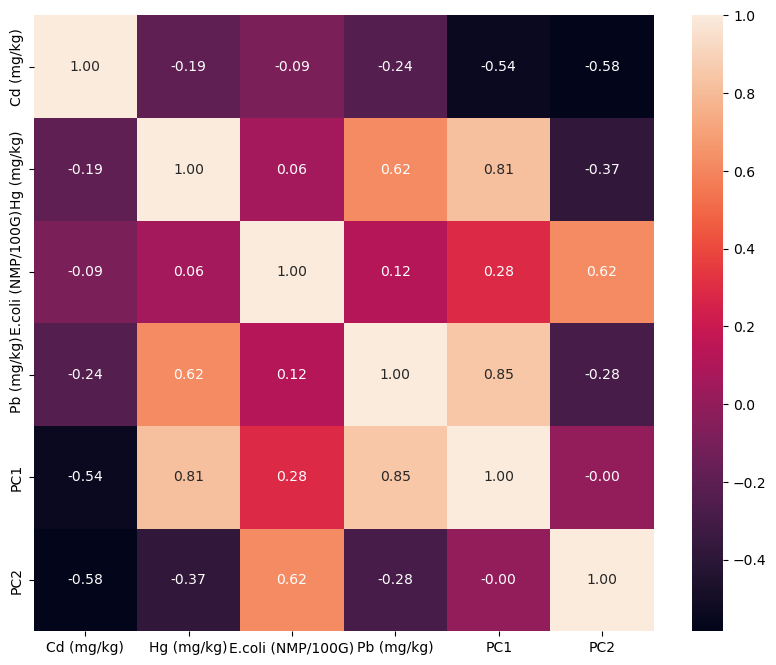

In [52]:
# pearson correlation
corr = df_pca1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True,fmt=".2f")

* PC1 - more correlated to Pb (mg/kg) and Hg (mg/kg)
* PC2 - more correlated to Cd (mg/kg)

### PCA1 vs PCA2 by: Specie, Porduction Area, Season and Class

__Specie__

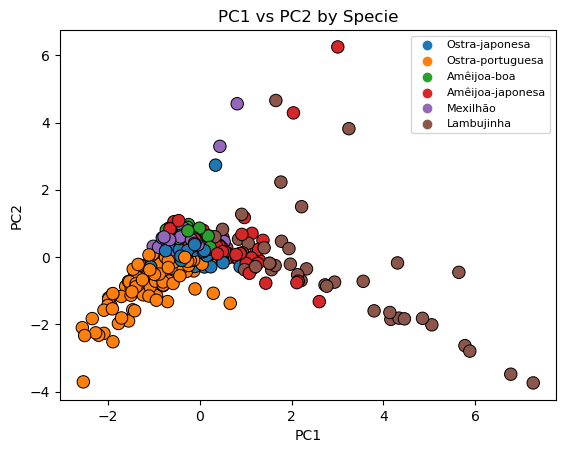

In [53]:
sns.scatterplot(data=df_pca1, x="PC1", y="PC2", hue='Espécie', marker='o',s=80,edgecolor='k',legend='full')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('PC1 vs PC2 by Specie')
plt.legend(fontsize=8, loc='best')
plt.show()

* 'Lambujinha' is associated to high values of the PC1 which has a high person correlation (liner correlation) to the variables Pb (mg/kg) and Hg (mg/kg)
* 'Ostra-portuguesa' is associated to high values of PC2, which has a high pearson correlation (linear correlation) to the variable cd (mg/kg), and low values of PC1 variabel
* Amêijoa-boa' low values of PC1 and PC2

__Production Area__

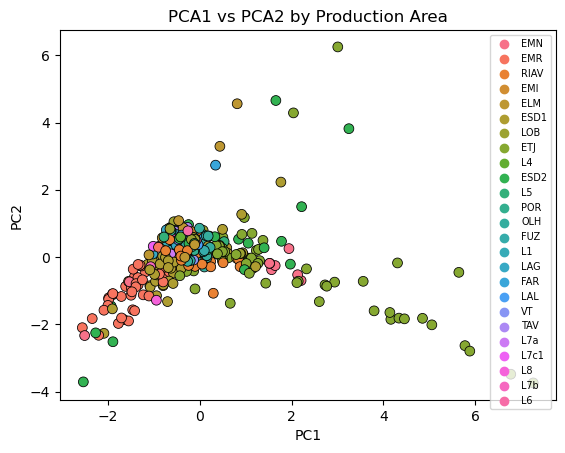

In [54]:
sns.scatterplot(data=df_pca1, x='PC1', y='PC2', hue='Zona de Produção',
                marker='o', s=50, edgecolor='k', legend='full')
plt.legend(fontsize=7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA1 vs PCA2 by Production Area')
plt.show()

In [55]:
df['Zona de Produção'].value_counts()

ETJ     61
ESD1    55
EMR     45
OLH     29
ESD2    27
RIAV    27
ELM     18
LOB     18
EMN     12
L5       9
L4       8
FAR      8
FUZ      6
LAG      6
POR      5
LAL      5
TAV      5
L1       4
EMI      3
VT       3
L7c1     3
L8       3
L7a      2
L7b      1
L6       1
Name: Zona de Produção, dtype: int64

In [56]:
# Production Areas with more than 20 unique values which represents the Top 5 Production Areas With More data
filtered_df_pca1 = df_pca1[df_pca1['Zona de Produção'].map(df_pca1['Zona de Produção'].value_counts()) > 20]
filtered_df_pca1['Zona de Produção'].value_counts()

ETJ     61
ESD1    55
EMR     45
OLH     29
RIAV    27
ESD2    27
Name: Zona de Produção, dtype: int64

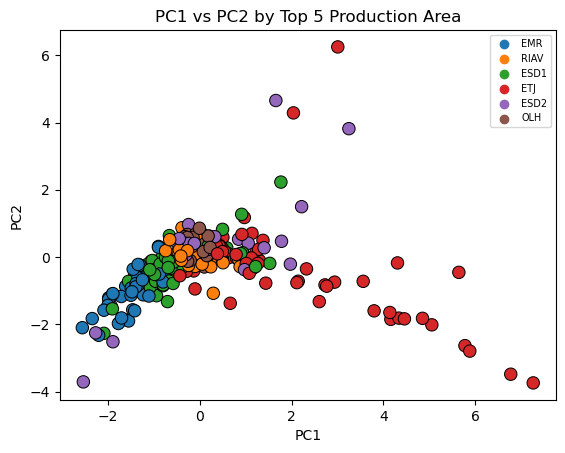

In [57]:
sns.scatterplot(data=filtered_df_pca1, x='PC1', y='PC2', hue='Zona de Produção',
                marker='o', s=80, edgecolor='k', legend='full')
plt.legend(fontsize=7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 by Top 5 Production Area')
plt.show()

* 'ETJ' is associated to high values of the PC1 which has a high person correlation (liner correlation) to the variables Pb (mg/kg) and Hg (mg/kg)
* 'EMR' and 'ESD1' are associated to high values of PC2, which has a high pearson correlation (linear correlation) to the variable cd (mg/kg), and low values of PC1 variabel
* 'OLH' low values of PC1 and PC2

__Season__

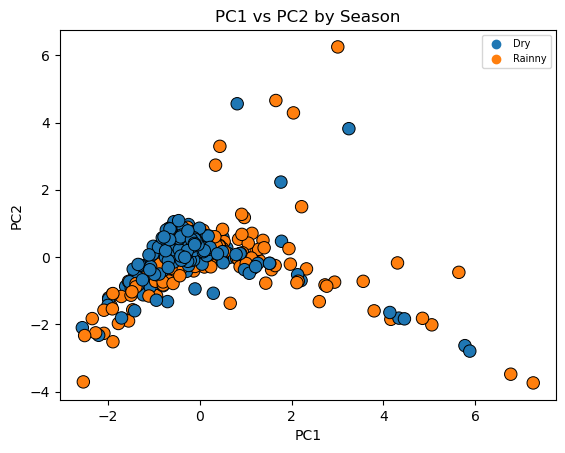

In [58]:
sns.scatterplot(data = df_pca1, x= 'PC1',y = 'PC2', hue='Season', marker='o', s=80,edgecolor='k')
plt.legend(fontsize=7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 by Season')
plt.show()

* 'Rainny' is associated to high values of PC1, which has a high person correlation (liner correlation) to the variables Pb (mg/kg) and Hg (mg/kg), and also PC2, which has a high pearson correlation (linear correlation) to the variable cd (mg/kg).
* 'Dry' is associated to low values of PC1 and PC2

__Class__

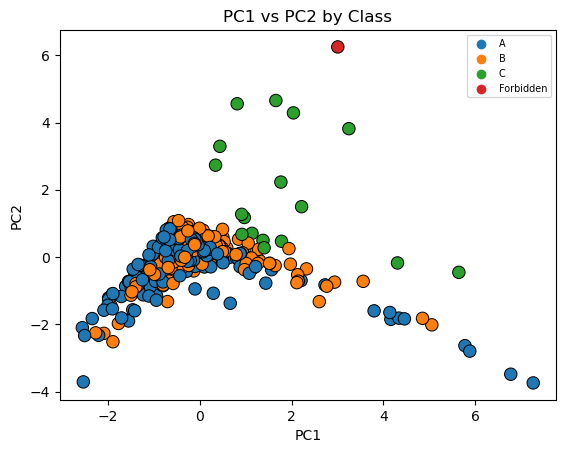

In [59]:
sns.scatterplot(data = df_pca1, x= 'PC1',y = 'PC2', hue='Class', marker='o', s=80,edgecolor='k')
plt.legend(fontsize=7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 by Class')
plt.show()

* 'A': low values of PC1 and PC2
* 'B': midel values of PC1 and PC2
* 'C': midel-high values of PC1 and PC2
* 'Forbidden': high values of PC1 and PC2

### Bi-Plot

In [60]:
df_pca1

,Espécie,Zona de Produção,Season,Class,Cd (mg/kg),Hg (mg/kg),E.coli (NMP/100G),Pb (mg/kg),PC1,PC2
0,Ostra-japonesa,EMN,Dry,A,0.14,0.019,17.0,0.08,-0.517412,0.487331
1,Ostra-portuguesa,EMR,Dry,A,0.90,0.016,17.0,0.06,-1.611446,-0.871993
2,Ostra-portuguesa,EMR,Rainny,A,1.20,0.030,45.0,0.01,-1.457436,-1.568171
3,Amêijoa-boa,RIAV,Dry,B,0.04,0.019,490.0,0.01,-0.384986,0.871528
4,Amêijoa-japonesa,EMI,Dry,B,0.18,0.024,1300.0,0.20,-0.076970,0.565224
...,...,...,...,...,...,...,...,...,...,...
359,Ostra-japonesa,RIAV,Dry,A,0.35,0.025,78.0,0.21,-0.409018,0.029480
360,Mexilhão,L5,Dry,A,0.20,0.011,40.0,0.15,-0.776944,0.596677
361,Ostra-portuguesa,EMR,Dry,A,1.40,0.030,230.0,0.01,-1.701296,-1.810193
362,Ostra-japonesa,ELM,Dry,B,0.20,0.030,490.0,0.10,-0.108433,0.368412


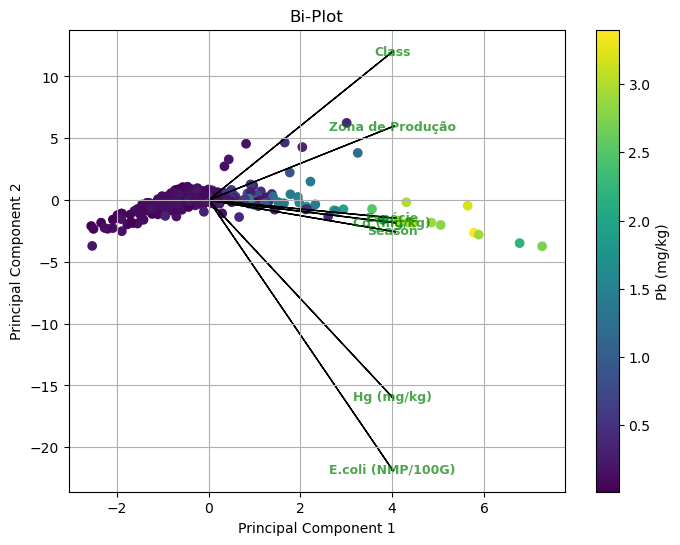

In [61]:
def biplot(pca, pca_df):
    n = pca_df.shape[1] - 2  # Excluding the last two columns and 'Pb (mg/kg)'
    plt.figure(figsize=(8, 6))
    sc = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Pb (mg/kg)'], cmap='viridis',
                     vmin=pca_df['Pb (mg/kg)'].min(), vmax=pca_df['Pb (mg/kg)'].max())
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Bi-Plot')
    
    plt.colorbar(sc, label='Pb (mg/kg)')  # Add the color scale (color bar)

    arrow_length = 4.0  # Normalize arrow lengths to have the same magnitude

    for i in range(n):
        if pca_df.columns[i] != 'Pb (mg/kg)':  # Skip the 'Pb (mg/kg)' column
            arrow_width = arrow_length * pca.components_[1, i] / pca.components_[0, i]
            plt.arrow(0, 0, arrow_length, arrow_width,
                      head_width=0.05, head_length=0.1, fc='k', ec='k')
            plt.text(arrow_length, arrow_width, pca_df.columns[i],
                     ha='center', va='center', color='g', fontsize=9, fontweight='bold', alpha=0.7)

    plt.grid()
    plt.show()

biplot(pca, df_pca1)
